In [ ]:
#!/usr/bin/env python3
# Download the 56 zip files in Images_png in batches
import urllib.request

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
    'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
    'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
    'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
    'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
    'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
    'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
    'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file

print("Download complete. Please check the checksums")





In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import DenseNet121
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K

from keras.models import load_model

import util

In [2]:
labeled_data = pd.read_csv('BBox_List_2017.csv')
labeled_data = labeled_data.iloc[:, :-3]
labeled_data.head()

,Image Index,Finding Label,Bbox [x,y,w,h]
0,00013118_008.png,Atelectasis,225.084746,547.019217,86.779661,79.186441
1,00014716_007.png,Atelectasis,686.101695,131.543498,185.491525,313.491525
2,00029817_009.png,Atelectasis,221.830508,317.053115,155.118644,216.949153
3,00014687_001.png,Atelectasis,726.237288,494.951420,141.016949,55.322034
4,00017877_001.png,Atelectasis,660.067797,569.780787,200.677966,78.101695


In [3]:
print(labeled_data.count())
print('Labels in Datatset', labeled_data['Finding Label'].unique())
print('Individual Count: ', labeled_data['Finding Label'].value_counts())

Image Index      984
Finding Label    984
Bbox [x          984
y                984
w                984
h]               984
dtype: int64
Labels in Datatset ['Atelectasis' 'Cardiomegaly' 'Effusion' 'Infiltrate' 'Mass' 'Nodule'
 'Pneumonia' 'Pneumothorax']
Individual Count:  Atelectasis     180
Effusion        153
Cardiomegaly    146
Infiltrate      123
Pneumonia       120
Pneumothorax     98
Mass             85
Nodule           79
Name: Finding Label, dtype: int64


In [4]:
labeled_data.isin(['00006605_009.png']).any()

Image Index      False
Finding Label    False
Bbox [x          False
y                False
w                False
h]               False
dtype: bool

In [5]:
patient_data = pd.read_csv('Data_Entry_2017_v2020.csv')
patient_data.tail()
print(patient_data.count())
#print('Labels in Datatset', (patient_data['Finding Labels'].unique()))
#print('Individual Count: ', patient_data['Finding Labels'].value_counts())

Image Index                    112120
Finding Labels                 112120
Follow-up #                    112120
Patient ID                     112120
Patient Age                    112120
Patient Gender                 112120
View Position                  112120
OriginalImage[Width            112120
Height]                        112120
OriginalImagePixelSpacing[x    112120
y]                             112120
dtype: int64


In [6]:
def get_train_generator(df, image_dir, x_col, y_cols, shuffle=True, batch_size=8, seed=1, target_w = 320, target_h = 320):
    """
    Return generator for training set, normalizing using batch
    statistics.

    Args:
      train_df (dataframe): dataframe specifying training data.
      image_dir (str): directory where image files are held.
      x_col (str): name of column in df that holds filenames.
      y_cols (list): list of strings that hold y labels for images.
      sample_size (int): size of sample to use for normalization statistics.
      batch_size (int): images per batch to be fed into model during training.
      seed (int): random seed.
      target_w (int): final width of input images.
      target_h (int): final height of input images.
    
    Returns:
        train_generator (DataFrameIterator): iterator over training set
    """        
    print("getting train generator...") 
    # normalize images
    image_generator = ImageDataGenerator(
        samplewise_center=True,
        samplewise_std_normalization= True)
    
    # flow from directory with specified batch size
    # and target image size
    generator = image_generator.flow_from_dataframe(
            dataframe=df,
            directory=image_dir,
            x_col=x_col,
            y_col=y_cols,
            class_mode="raw",
            batch_size=batch_size,
            shuffle=shuffle,
            seed=seed,
            target_size=(target_w,target_h))
    
    return generator

In [7]:
labels = ['Atelectasis']

In [8]:

data = []
data = [['00000005_001.png', '1']]
sample_data = pd.DataFrame(data, columns = ['Image', 'Atelectasis'])
IMAGE_DIR = "C:/Users/msati/OneDrive/Desktop/AI-for-Medical-Diagnosis-master/images/"
train_generator = get_train_generator(sample_data, IMAGE_DIR, "Image", labels)
sample_data

getting train generator...
Found 1 validated image filenames.


,Image,Atelectasis
0,00000005_001.png,1


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


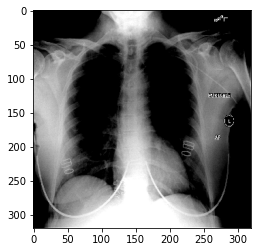

In [9]:
x, y = train_generator.__getitem__(0)
plt.imshow(x[0]);

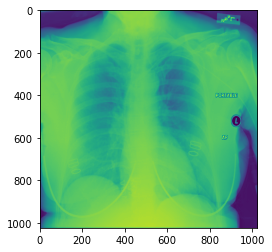

In [10]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
img = mpimg.imread('C:/Users/msati/OneDrive/Desktop/AI-for-Medical-Diagnosis-master/images/00000005_001.png')
plt.imshow(img)

Loading images


100%|██████████████████████████████████████████████████████████████████████████████| 3875/3875 [03:10<00:00, 20.39it/s]


(5216, 200, 200)
(5216,)
(array(['bacteria', 'normal', 'virus'], dtype='<U8'), array([2530, 1341, 1345], dtype=int64))
Display several images


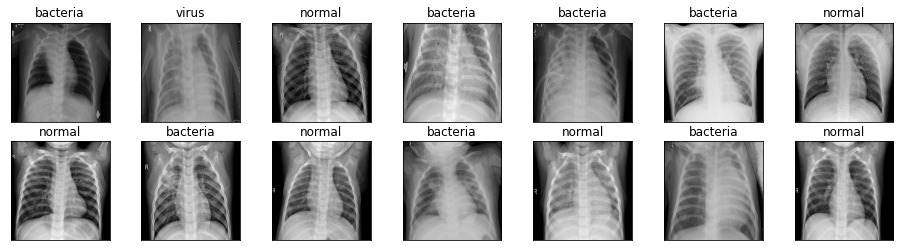

  0%|                                                                                          | 0/234 [00:00<?, ?it/s]

Loading test images


100%|████████████████████████████████████████████████████████████████████████████████| 390/390 [00:14<00:00, 26.45it/s]


Label preprocessing
Reshaping X data
Data augmentation
CNN
(200, 200, 1)
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
163/163 [==============================] - 176s 1s/step - loss: 2.5211 - acc: 0.6325 - val_loss: 0.7764 - val_acc: 0.7628
Epoch 2/30
163/163 [==============================] - 170s 1s/step - loss: 0.6528 - acc: 0.7207 - val_loss: 0.7990 - val_acc: 0.7468
Epoch 3/30
163/163 [==============================] - 174s 1s/step - loss: 0.6286 - acc: 0.7316 - val_loss: 1.2937 - val_acc: 0.5192
Epoch 4/30
163/163 [==============================] - 175s 1s/step - loss: 0.6051 - acc: 0.7431 - val_loss: 0.8515 - val_acc: 0.7676
Epoch 5/30
163/163 [==============================] - 180s 1s/step - loss: 0.5956 - acc: 0.7488 - val_loss: 0.6817 - val_acc: 0.7628
Epoch 6/30
163/163 [==============================] - 183s 1s/step - loss: 0.5895 - acc: 0.7462 - val_loss: 0.7133 - val_acc: 0.7788
Epoch 7/30
163/163 [==============================] -

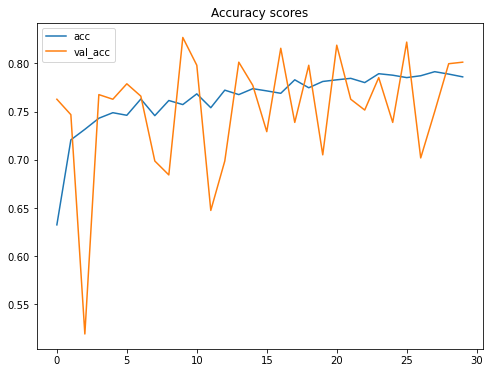

Displaying loss


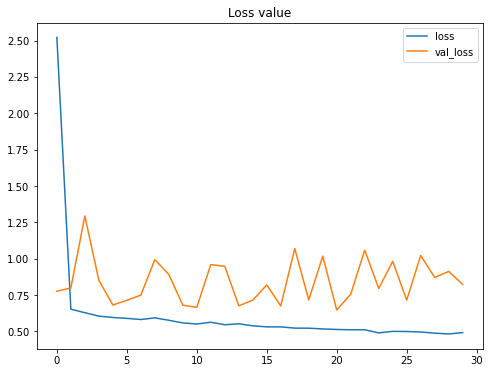

[[4.7256701e-02 9.2698717e-01 2.5756169e-02]
 [1.2336481e-02 9.6990460e-01 1.7758884e-02]
 [3.5903966e-01 4.8664430e-01 1.5431604e-01]
 ...
 [6.8295437e-01 1.0376406e-04 3.1694180e-01]
 [6.1872005e-01 4.6015866e-04 3.8081977e-01]
 [9.4453257e-01 1.0463965e-02 4.5003504e-02]]
Model evaluation
[array(['bacteria', 'normal', 'virus'], dtype='<U8')]


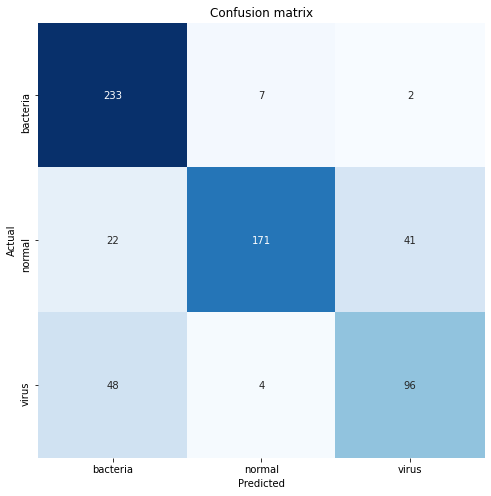

In [11]:
import os
import cv2
import pickle	# Used to save variables
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm	# Used to display progress bar
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from keras.models import Model, load_model
from keras.layers import Dense, Input, Conv2D, MaxPool2D, Flatten
from keras.preprocessing.image import ImageDataGenerator	# Used to generate images

np.random.seed(22)

# Do not forget to include the last slash
def load_normal(norm_path):
    norm_files = np.array(os.listdir(norm_path))
    norm_labels = np.array(['normal']*len(norm_files))
    
    norm_images = []
    for image in tqdm(norm_files):
		# Read image
        image = cv2.imread(norm_path + image)
		# Resize image to 200x200 px
        image = cv2.resize(image, dsize=(200,200))
		# Convert to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        norm_images.append(image)
        
    norm_images = np.array(norm_images)
    
    return norm_images, norm_labels

def load_pneumonia(pneu_path):
    pneu_files = np.array(os.listdir(pneu_path))
    pneu_labels = np.array([pneu_file.split('_')[1] for pneu_file in pneu_files])
    
    pneu_images = []
    for image in tqdm(pneu_files):
		# Read image
        image = cv2.imread(pneu_path + image)
		# Resize image to 200x200 px
        image = cv2.resize(image, dsize=(200,200))
		# Convert to grayscale
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        pneu_images.append(image)
        
    pneu_images = np.array(pneu_images)
    
    return pneu_images, pneu_labels


print('Loading images')
# All images are stored in _images, all labels are in _labels
norm_images, norm_labels = load_normal('archive/chest_xray/train/NORMAL/')
pneu_images, pneu_labels = load_pneumonia('archive/chest_xray/train/PNEUMONIA/')

# Put all train images to X_train 
X_train = np.append(norm_images, pneu_images, axis=0)

# Put all train labels to y_train
y_train = np.append(norm_labels, pneu_labels)

print(X_train.shape)
print(y_train.shape)
# Finding out the number of samples of each class
print(np.unique(y_train, return_counts=True))

print('Display several images')
fig, axes = plt.subplots(ncols=7, nrows=2, figsize=(16, 4))

indices = np.random.choice(len(X_train), 14)
counter = 0

for i in range(2):
    for j in range(7):
        axes[i,j].set_title(y_train[indices[counter]])
        axes[i,j].imshow(X_train[indices[counter]], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        counter += 1
plt.show()


print('Loading test images')
# Do the exact same thing as what we have done on train data
norm_images_test, norm_labels_test = load_normal('archive/chest_xray/test/NORMAL/')
pneu_images_test, pneu_labels_test = load_pneumonia('archive/chest_xray/test/PNEUMONIA/')
X_test = np.append(norm_images_test, pneu_images_test, axis=0)
y_test = np.append(norm_labels_test, pneu_labels_test)

# Save the loaded images to pickle file for future use
with open('pneumonia_data.pickle', 'wb') as f:
    pickle.dump((X_train, X_test, y_train, y_test), f)

# Here's how to load it
with open('pneumonia_data.pickle', 'rb') as f:
    (X_train, X_test, y_train, y_test) = pickle.load(f)

print('Label preprocessing')

# Create new axis on all y data
y_train = y_train[:, np.newaxis]
y_test = y_test[:, np.newaxis]

# Initialize OneHotEncoder object
one_hot_encoder = OneHotEncoder(sparse=False)

# Convert all labels to one-hot
y_train_one_hot = one_hot_encoder.fit_transform(y_train)
y_test_one_hot = one_hot_encoder.transform(y_test)

print('Reshaping X data')
# Reshape the data into (no of samples, height, width, 1), where 1 represents a single color channel
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

print('Data augmentation')
# Generate new images with some randomness
datagen = ImageDataGenerator(
		rotation_range = 10,  
        zoom_range = 0.1, 
        width_shift_range = 0.1, 
        height_shift_range = 0.1)

datagen.fit(X_train)
train_gen = datagen.flow(X_train, y_train_one_hot, batch_size = 32)

print('CNN')

# Define the input shape of the neural network
input_shape = (X_train.shape[1], X_train.shape[2], 1)
print(input_shape)

input1 = Input(shape=input_shape)

cnn = Conv2D(16, (3, 3), activation='relu', strides=(1, 1), 
    padding='same')(input1)
cnn = Conv2D(32, (3, 3), activation='relu', strides=(1, 1), 
    padding='same')(cnn)
cnn = MaxPool2D((2, 2))(cnn)

cnn = Conv2D(16, (2, 2), activation='relu', strides=(1, 1), 
    padding='same')(cnn)
cnn = Conv2D(32, (2, 2), activation='relu', strides=(1, 1), 
    padding='same')(cnn)
cnn = MaxPool2D((2, 2))(cnn)

cnn = Flatten()(cnn)
cnn = Dense(100, activation='relu')(cnn)
cnn = Dense(50, activation='relu')(cnn)
output1 = Dense(3, activation='softmax')(cnn)

model = Model(inputs=input1, outputs=output1)

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', metrics=['acc'])

# Using fit_generator() instead of fit() because we are going to use data
# taken from the generator. Note that the randomness is changing
# on each epoch
history = model.fit_generator(train_gen, epochs=30, 
          validation_data=(X_test, y_test_one_hot))

# Saving model```
model.save('pneumonia_cnn.h5')

print('Displaying accuracy')
plt.figure(figsize=(8,6))
plt.title('Accuracy scores')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['acc', 'val_acc'])
plt.show()

print('Displaying loss')
plt.figure(figsize=(8,6))
plt.title('Loss value')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# Predicting test data
predictions = model.predict(X_test)
print(predictions)

predictions = one_hot_encoder.inverse_transform(predictions)

print('Model evaluation')
print(one_hot_encoder.categories_)

classnames = ['bacteria', 'normal', 'virus']

# Display confusion matrix
cm = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8,8))
plt.title('Confusion matrix')
sns.heatmap(cm, cbar=False, xticklabels=classnames, yticklabels=classnames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [21]:
#importing confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, predictions)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))
#
#print('\nF1-score: {:.2f}'.format(f1_score(y_test, predictions)))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, predictions))
print('Micro Precision: {:.2f}'.format(precision_score(y_test, predictions, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, predictions, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, predictions, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, predictions, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, predictions, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, predictions, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, predictions, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, predictions, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, predictions, average='weighted')))

Confusion Matrix

[[233   5   4]
 [ 14 166  54]
 [ 27   1 120]]

Accuracy: 0.83


Classification Report

              precision    recall  f1-score   support

    bacteria       0.85      0.96      0.90       242
      normal       0.97      0.71      0.82       234
       virus       0.67      0.81      0.74       148

    accuracy                           0.83       624
   macro avg       0.83      0.83      0.82       624
weighted avg       0.85      0.83      0.83       624

Micro Precision: 0.83
Micro Recall: 0.83
Micro F1-score: 0.83

Macro Precision: 0.83
Macro Recall: 0.83
Macro F1-score: 0.82

Weighted Precision: 0.85
Weighted Recall: 0.83
Weighted F1-score: 0.83


In [24]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model('pneumonia_cnn.h5')
loaded_model.layers[0].input_shape #(None, 160, 160, 3)

[(None, 200, 200, 1)]

In [42]:
X_train[1].shape

(200, 200, 1)

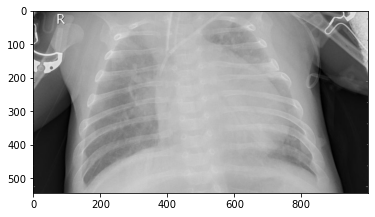

In [43]:
from keras.preprocessing import image
IMG_SIZE = 200
image_path="archive/chest_xray/test/PNEUMONIA/person1_virus_7.jpeg"
image = cv2.imread(image_path)
		# Resize image to 200x200 px
#image = cv2.resize(image, dsize=(200,200))
		# Convert to grayscale
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image)
#img = np.expand_dims(img, axis=0)
result = loaded_model.predict(X_test[1])
#plt.title(get_label_name(result[0][0]))
plt.show()

In [39]:
from keras.preprocessing import image
import numpy as np

# dimensions of our images
img_width, img_height = 200, 200

# load the model we saved
model = load_model('pneumonia_cnn.h5')
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# predicting images
img = image.load_img(image_path, target_size=(img_width, img_height))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)

images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print (classes)

# predicting multiple images at once
img = image.load_img('test2.jpg', target_size=(img_width, img_height))
y = image.img_to_array(img)
y = np.expand_dims(y, axis=0)

# pass the list of multiple images np.vstack()
images = np.vstack([x, y])
classes = model.predict(images, batch_size=10)

# print the classes, the images belong to
print (classes)
print (classes[0])
print( classes[0][0])

ValueError: in user code:

    C:\Users\msati\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\msati\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1452 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\msati\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\msati\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\msati\anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\msati\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1445 run_step  **
        outputs = model.predict_step(data)
    C:\Users\msati\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1418 predict_step
        return self(x, training=False)
    C:\Users\msati\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:985 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\msati\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:385 call
        return self._run_internal_graph(
    C:\Users\msati\anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:508 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\msati\anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:975 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs,
    C:\Users\msati\anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:212 assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer conv2d is incompatible with the layer: expected axis -1 of input shape to have value 1 but received input with shape [None, 200, 200, 3]
